# Demand Forecasting: A Case Study of Hotel Booking Cancellations
                                                                                           by Siddharth Dixit

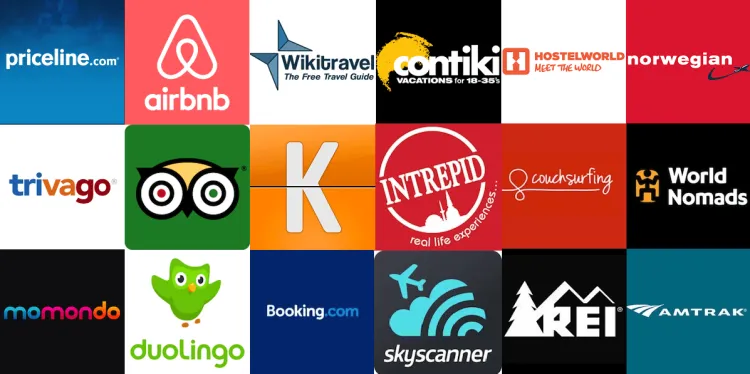

### Context
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

### Content
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

### Acknowledgements
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.
The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

Research Paper Link: https://www.sciencedirect.com/science/article/pii/S2352340918315191


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
hotel_1 = pd.read_csv('H1.csv',parse_dates=True,index_col='ReservationStatusDate')
hotel_2 = pd.read_csv('H2.csv',parse_dates=True,index_col='ReservationStatusDate')
hotel_1.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
ReservationStatusDate,,,,,,,,,,,,,,,,,,,,,
2015-07-01,0,342,2015,July,27,1,0,0,2,0,...,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out
2015-07-01,0,737,2015,July,27,1,0,0,2,0,...,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out
2015-07-02,0,7,2015,July,27,1,0,1,1,0,...,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out
2015-07-02,0,13,2015,July,27,1,0,1,1,0,...,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out
2015-07-03,0,14,2015,July,27,1,0,2,2,0,...,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out
2015-07-03,0,14,2015,July,27,1,0,2,2,0,...,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out
2015-07-03,0,0,2015,July,27,1,0,2,2,0,...,0,No Deposit,NULL,NULL,0,Transient,107.0,0,0,Check-Out
2015-07-03,0,9,2015,July,27,1,0,2,2,0,...,0,No Deposit,303,NULL,0,Transient,103.0,0,1,Check-Out
2015-05-06,1,85,2015,July,27,1,0,3,2,0,...,0,No Deposit,240,NULL,0,Transient,82.0,0,1,Canceled


## Exploratory Data Analysis
- Before starting this step you must have a good understanding of all the features present in your data
- Goal is to find hidden trends and patterns within your data.
- Every plot should convey a story which relates it to the real world.
- This step depends entirely upon your imagination!

### 1. Data Cleaning 

In [3]:
# Find out missing entries
print(hotel_1.isna().sum())
print(hotel_2.isna().sum())

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [4]:
# Representing all null values in the same way so that they can be treated later on...


hotel_1 = hotel_1.replace(to_replace = '       NULL', 
                 value =np.NAN) 
print(hotel_1.isna().sum())
hotel_2 = hotel_2.replace(to_replace = '       NULL', 
                 value =np.NAN) 
print(hotel_2.isna().sum())
#hotel_1['Country'].value_counts()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           0
Babies                             0
Meal                               0
Country                          464
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                           8209
Company                        36952
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
R

In [5]:
# Drop Company from both hotel_1 & hotel_2 datasets
hotel_1 = hotel_1.drop(['Company'],axis=1)
hotel_2 = hotel_2.drop(['Company'],axis=1)

# Fill NA values using Most frequently occuring value in that column
hotel_1['Country'] = hotel_1['Country'].fillna(hotel_1['Country'].mode()[0])
hotel_1['Agent'] = hotel_1['Agent'].fillna(hotel_1['Agent'].mode()[0])

hotel_2['Country'] = hotel_2['Country'].fillna(hotel_2['Country'].mode()[0])
hotel_2['Agent'] = hotel_2['Agent'].fillna(hotel_2['Agent'].mode()[0])
hotel_2['Children'] = hotel_2['Children'].fillna(hotel_2['Children'].mode()[0])

In [6]:
print(hotel_1.isna().sum())

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
dtype: int64


### 2) Data Exploration

In [7]:
hotel_1.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus'],
      dtype='object')

['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'CustomerType', 'ReservationStatus']


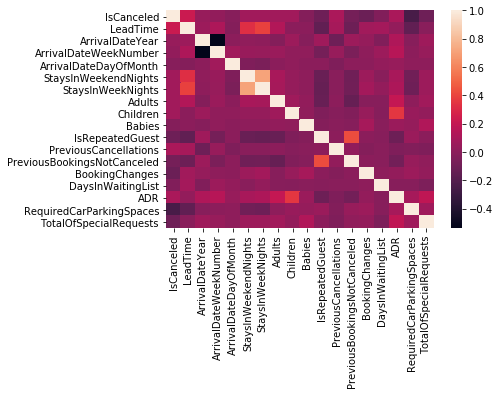

In [8]:
# Separate out your Numerical & Categorical Features
categorical_features = []
numerical_features = []

for col in hotel_1.columns:
    if(hotel_1[col].dtype!='object'):
        numerical_features.append(col)
    else:
        categorical_features.append(col)
print(categorical_features)
import seaborn as sns
sns.heatmap(hotel_1[numerical_features].corr())

### Start asking questions pertaining to your problem and answer them using your Data
- **Q1. Are booking cancellations affected by the time of the year?** 

 Ans: *Plot a Bargraph to see the total number of cancellations in each month for each hotel.* 

In [9]:
hotel_1['IsCanceled'].sample(10)

ReservationStatusDate
2016-11-03    0
2016-03-10    0
2017-04-10    1
2017-02-25    0
2015-10-25    0
2017-02-01    1
2015-06-17    1
2016-06-30    0
2016-12-18    0
2016-10-20    1
Name: IsCanceled, dtype: int64

In [10]:
# Create a new Dataframe which contains only the cancelled entries from Hotel_1
h1_canc = hotel_1[hotel_1['IsCanceled']==1]

# Similarly create a new Dataframe which contains only the NON-cancelled entries from Hotel_1
h1_not_canc = hotel_1[hotel_1['IsCanceled']==0]

# Total number of monthly Cancellations of Hotel-1 by month
h1_canc_by_month = h1_canc.groupby(['ArrivalDateMonth']).count()
h1_not_canc_by_month = h1_not_canc.groupby(['ArrivalDateMonth']).count()
h1_canc_by_month.head(12)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
ArrivalDateMonth,,,,,,,,,,,,,,,,,,,,,
April,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,...,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059
August,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637,...,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637
December,631,631,631,631,631,631,631,631,631,631,...,631,631,631,631,631,631,631,631,631,631
February,795,795,795,795,795,795,795,795,795,795,...,795,795,795,795,795,795,795,795,795,795
January,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
July,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436,...,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436
June,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,...,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
March,763,763,763,763,763,763,763,763,763,763,...,763,763,763,763,763,763,763,763,763,763
May,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,...,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024


Similarly repeat the process for Hotel-2

In [11]:
# Create a new Dataframe which contains only the cancelled entries from Hotel_2
h2_canc = hotel_2[hotel_2['IsCanceled']==1]

# Similarly create a new Dataframe which contains only the NON-cancelled entries from Hotel_1
h2_not_canc = hotel_2[hotel_2['IsCanceled']==0]

# Group by a feature of your choice and then apply a summary statistic

# Total number of monthly Cancellations of Hotel-1 by month
h2_canc_by_month = h2_canc.groupby(['ArrivalDateMonth']).count()
h2_not_canc_by_month = h2_not_canc.groupby(['ArrivalDateMonth']).count()
h2_canc_by_month.head(12)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
ArrivalDateMonth,,,,,,,,,,,,,,,,,,,,,
April,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,...,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465
August,3602,3602,3602,3602,3602,3602,3602,3602,3602,3602,...,3602,3602,3602,3602,3602,3602,3602,3602,3602,3602
December,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,...,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740
February,1901,1901,1901,1901,1901,1901,1901,1901,1901,1901,...,1901,1901,1901,1901,1901,1901,1901,1901,1901,1901
January,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,...,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482
July,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,...,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306
June,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,...,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528
March,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,...,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386
May,3653,3653,3653,3653,3653,3653,3653,3653,3653,3653,...,3653,3653,3653,3653,3653,3653,3653,3653,3653,3653


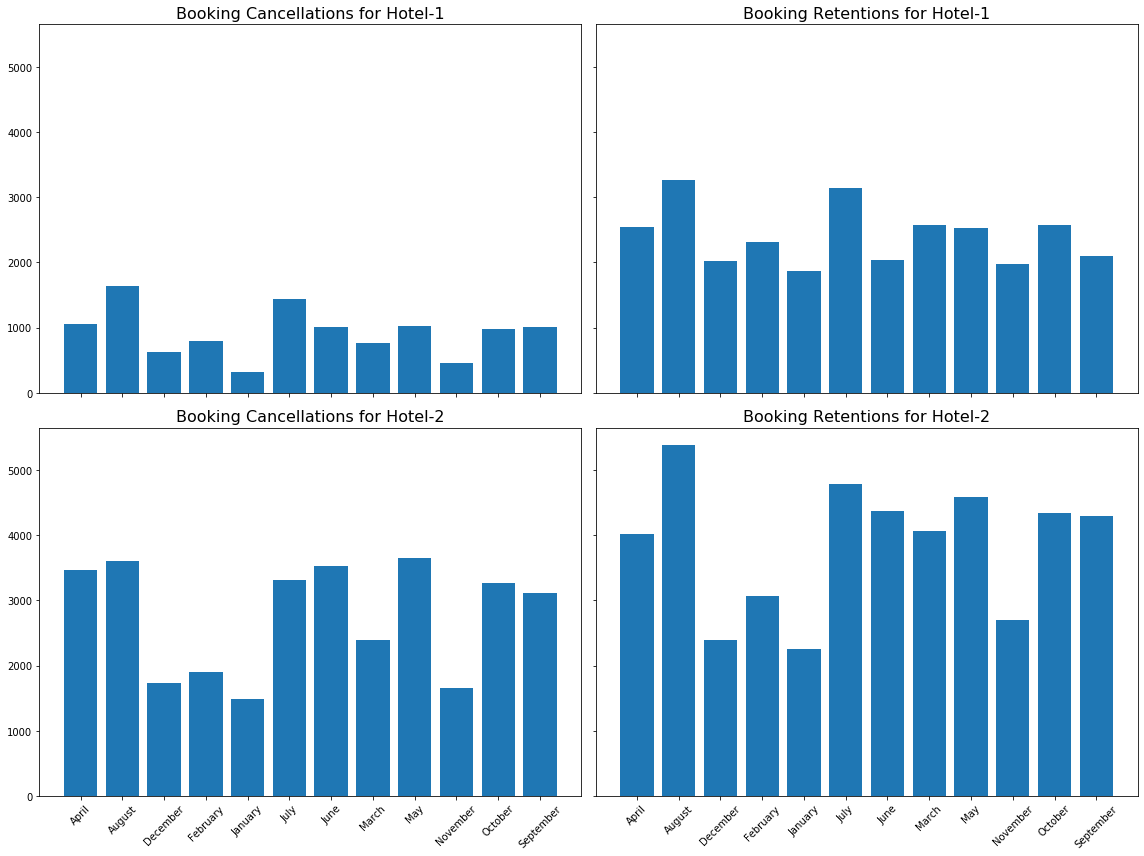

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(16,12))
ax[0,0].bar(x=h1_canc_by_month.index,height='IsCanceled',data=h1_canc_by_month)
ax[0, 0].set_title('Booking Cancellations for Hotel-1', fontsize=16)

ax[0,1].bar(x=h1_not_canc_by_month.index,height='IsCanceled',data=h1_not_canc_by_month)
ax[0, 1].set_title('Booking Retentions for Hotel-1', fontsize=16)

ax[1,0].bar(x=h2_canc_by_month.index,height='IsCanceled',data=h2_canc_by_month)
ax[1, 0].set_title('Booking Cancellations for Hotel-2', fontsize=16)
plt.sca(ax[1, 0])
plt.xticks(rotation=45)

ax[1,1].bar(x=h2_not_canc_by_month.index,height='IsCanceled',data=h2_not_canc_by_month)
ax[1, 1].set_title('Booking Retentions for Hotel-2', fontsize=16)
plt.sca(ax[1, 1])
plt.xticks(rotation=45)

fig.tight_layout()
plt.show()

So do Booking cancelations depend on the month of booking?

Ans: ____________ 

### Feature Engineering
- Process of creating new features and meaningful features from exisiting ones to replace them.
- Moslty used before building models but extremely helpful while EDA as well.
- Works best when combined with domain knowledge.

Ex- In our case, perhaps it makes more sense to consider the percentage of cancelations rather than the total number of cancelations as total number of cancelations is a misleading term to answer our question!

In [14]:
canc_h1_list = h1_canc_by_month['IsCanceled']
total_bookings_h1_by_month = h1_canc_by_month['IsCanceled'] + h1_not_canc_by_month['IsCanceled']
percent_canc_h1 = canc_h1_list/total_bookings_h1_by_month

In [15]:
canc_h2_list = h2_canc_by_month['IsCanceled']
total_bookings_h2_by_month = h2_canc_by_month['IsCanceled'] + h2_not_canc_by_month['IsCanceled']
percent_canc_h2 = canc_h2_list/total_bookings_h2_by_month

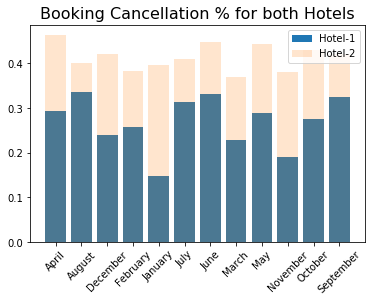

In [16]:
plt.bar(x=percent_canc_h1.index,height=percent_canc_h1.values,label= 'Hotel-1')
plt.bar(x=percent_canc_h2.index,height=percent_canc_h2.values,label= 'Hotel-2',alpha=0.2)
plt.legend()
plt.title('Booking Cancellation % for both Hotels', fontsize=16)
plt.xticks(rotation=45)
plt.show()

**Notice the subtle difference in the month receiving highest cancellations for Hotel-2**
Using simply the total number of cancellations we were getting August as the worst month for Hotel-2, whereas now we get April. Many more interesting things come up from this plot Ex- The highest difference b/w cancellations for the two hotels is during January.

## Conclusion 
We conclude that month of booking definitely plays a role in determining whether a person would *cancel* the Booking or not. In addition we observe that **August** is more or less the best month for both the Hotels as they recieve the highest numbers of customers during that time. Thus the hotel staff or the booking website should offer people more incentives to prevent cancellations during this month!

## Further Questions?
A follow up question would be:- Now that we know that month of booking is important, Do Booking Cancellations also depend upon the week of the year? Or were these trend of Bookings same for all 3 years?

This was just the analysis for a single feature (Month of Booking). You can try to formulate questions and conduct similar analysis for almost all the features!!

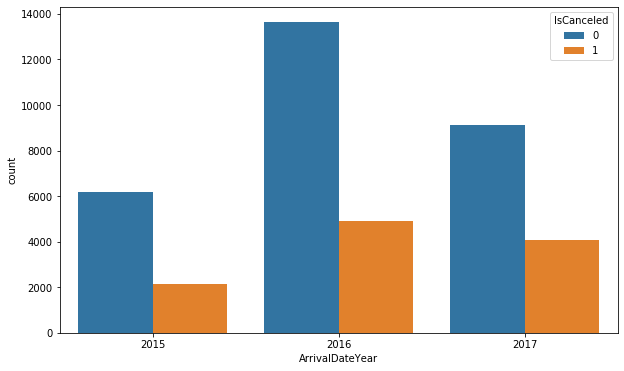

In [17]:
# Cancellations for Hotel-1 across different years
plt.figure(figsize=(10,6))
sns.countplot(data=hotel_1,x='ArrivalDateYear',hue='IsCanceled')
plt.show()

# Data Preparation for Modelling

In [18]:
#hotel_bookings_df['arrival_date_month'] = hotel_1['ArrivalDateMonth'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                           # 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
#hotel_1['hotel'] = hotel_1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
#hotel_1["total_members"] = hotel_1["adults"] + hotel_bookings_df["children"] + hotel_bookings_df["babies"]
#hotel_1["total_stay"] = hotel_1["stays_in_weekend_nights"]+ hotel_bookings_df["stays_in_week_nights"]
#hotel_1.drop(columns = ['adults', 'babies', 'children', 'stays_in_weekend_nights', 'stays_in_week_nights'],inplace=True,axis=1)

In [19]:
hotel_1.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
DaysInWaitingList                int64
CustomerType                    object
ADR                      

### Select Features which you want to include in your model.

In [20]:
hotel_1['Agent'].value_counts()# Too many categories 
# ReservationStatus can cause data leakage as it is very related to Booking Cancellation
h1_df_modelling = hotel_1.drop(['ArrivalDateYear','ArrivalDateDayOfMonth','Agent','ReservationStatus'],axis=1)
h1_df_modelling.head()

,IsCanceled,LeadTime,ArrivalDateMonth,ArrivalDateWeekNumber,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,...,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
ReservationStatusDate,,,,,,,,,,,,,,,,,,,,,
2015-07-01,0,342,July,27,0,0,2,0,0,BB,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
2015-07-01,0,737,July,27,0,0,2,0,0,BB,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2015-07-02,0,7,July,27,0,1,1,0,0,BB,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
2015-07-02,0,13,July,27,0,1,1,0,0,BB,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
2015-07-03,0,14,July,27,0,2,2,0,0,BB,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


In [21]:
df_encoded = pd.get_dummies(h1_df_modelling)
print("Dimensions of Encoded dataset are:-", df_encoded.shape)
df_encoded.sample(20)

Dimensions of Encoded dataset are:- (40060, 196)


,IsCanceled,LeadTime,ArrivalDateWeekNumber,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,...,AssignedRoomType_I,AssignedRoomType_L,AssignedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
ReservationStatusDate,,,,,,,,,,,,,,,,,,,,,
2017-01-30,0,0,5,1,0,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2017-05-22,0,251,19,4,10,2,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2015-12-27,0,1,52,0,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-07-30,0,150,30,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2015-08-10,1,181,35,1,5,2,2,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2015-10-23,0,0,43,0,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-12-26,0,1,52,1,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-04-19,0,8,16,2,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2017-08-12,0,204,32,0,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
df_encoded = pd.get_dummies(h1_df_modelling)
print("Dimensions of Encoded dataset are:-", df_encoded.shape)
df_encoded.sample(20)

Dimensions of Encoded dataset are:- (40060, 196)


,IsCanceled,LeadTime,ArrivalDateWeekNumber,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,...,AssignedRoomType_I,AssignedRoomType_L,AssignedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
ReservationStatusDate,,,,,,,,,,,,,,,,,,,,,
2015-10-01,0,115,39,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2015-11-20,0,0,47,0,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2017-06-08,0,0,23,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-04-06,0,171,15,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2015-09-02,1,247,41,1,2,2,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2017-07-30,0,165,29,2,6,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-08-08,0,194,32,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2017-03-19,0,3,11,0,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2015-11-01,0,4,44,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Split into training and test set

In [23]:
y = df_encoded.iloc[:,0]
X = df_encoded.drop(['IsCanceled'],axis=1)# Dropping response variable
X.head()# Confirm to see that response is no longer in X

,LeadTime,ArrivalDateWeekNumber,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,...,AssignedRoomType_I,AssignedRoomType_L,AssignedRoomType_P,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
ReservationStatusDate,,,,,,,,,,,,,,,,,,,,,
2015-07-01,342,27,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2015-07-01,737,27,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2015-07-02,7,27,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2015-07-02,13,27,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2015-07-03,14,27,0,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
# Convert response from int to categorical(object type)
#y = y.astype("int64")
#y.sample(5)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=26)

In [26]:
# Defining a function to train models
def training(model,X_train, y_train):
    return model.fit(X_train, y_train)

In [27]:
# Defining a function to test models
def evaluation_stats(model,X_train, X_test, y_train, y_test,algo):
    print('Train Accuracy')
    if algo=='NN':
        print(confusion_matrix(y_train,model.predict_classes(X_train)))
        y_pred = model.predict_classes(X_test)
    else:
        print(confusion_matrix(y_train,model.predict(X_train)))
        y_pred = model.predict(X_test)
    print('Validation Accuracy')
    
    print(confusion_matrix(y_test,y_pred))
    print('Classification_report')
    print(classification_report(y_test,y_pred))

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
#from imblearn.over_sampling import SMOTE

## Random Forest Classifier

In [29]:
rf_model = training(RandomForestClassifier(n_estimators=1000,max_depth=10),X_train,y_train)
evaluation_stats(rf_model,X_train, X_test, y_train, y_test,'RANDOM FOREST')

Train Accuracy
[[21449   317]
 [ 4641  3638]]
Validation Accuracy
[[7065  107]
 [1617 1226]]
Classification_report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7172
           1       0.92      0.43      0.59      2843

    accuracy                           0.83     10015
   macro avg       0.87      0.71      0.74     10015
weighted avg       0.84      0.83      0.80     10015



## XGBoost Classifier

In [30]:
xbg_model = training(XGBClassifier(n_estimators=1000,max_depth=10),X_train,y_train)
evaluation_stats(xbg_model,X_train, X_test, y_train, y_test,'XGBoost')

Train Accuracy
[[21748    18]
 [   49  8230]]
Validation Accuracy
[[6708  464]
 [ 598 2245]]
Classification_report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7172
           1       0.83      0.79      0.81      2843

    accuracy                           0.89     10015
   macro avg       0.87      0.86      0.87     10015
weighted avg       0.89      0.89      0.89     10015



## Artificial Neural Network

In [31]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### ANN with 1 hidden layer, 12 Neurons and Sigmoid Activation 

In [32]:
model = Sequential()
model.add(Dense(12, input_dim=195, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X, y, epochs=20, batch_size= 100)# Dataset would be divided into n/100 parts each with 100 samples
#The model weights will be updated after each batch of 100 samples.
#This also means that one epoch will involve n/100 batches or n/100 weight updates to the model.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 2,365
Trainable params: 2,365
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40060/40060 [==============================] - 1s 20us/step - loss: 0.6025 - accuracy: 0.6753
Epoch 2/20
40060/40060 [==============================] - 1s 14us/step - loss: 0.4978 - accuracy: 0.7299
Epoch 3/20
40060/40060 [==============================] - 1s 13us/step - loss: 0.4239 - accuracy: 0.8125
Epoch 4/20
40060/40060 [==============================] - 1s 13us/step - loss: 0.3752 - accuracy: 0.8448
Epoch 5/20
40060/40060 [==============================] - 1s 14us/step - loss: 0.3517 - accura

In [33]:
evaluation_stats(model,X_train, X_test, y_train, y_test,'NN')

Train Accuracy
[[20257  1509]
 [ 2310  5969]]
Validation Accuracy
[[6694  478]
 [ 806 2037]]
Classification_report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7172
           1       0.81      0.72      0.76      2843

    accuracy                           0.87     10015
   macro avg       0.85      0.82      0.84     10015
weighted avg       0.87      0.87      0.87     10015



In [34]:
model2 = Sequential()
model2.add(Dense(1000, input_dim=195, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X, y, epochs=20, batch_size= 100)

Epoch 1/20
40060/40060 [==============================] - 2s 42us/step - loss: 0.4141 - accuracy: 0.8082
Epoch 2/20
40060/40060 [==============================] - 2s 45us/step - loss: 0.3262 - accuracy: 0.8570
Epoch 3/20
40060/40060 [==============================] - 2s 46us/step - loss: 0.3147 - accuracy: 0.8612
Epoch 4/20
40060/40060 [==============================] - 2s 46us/step - loss: 0.3053 - accuracy: 0.8648
Epoch 5/20
40060/40060 [==============================] - 2s 45us/step - loss: 0.3013 - accuracy: 0.8665
Epoch 6/20
40060/40060 [==============================] - 2s 45us/step - loss: 0.2976 - accuracy: 0.8681
Epoch 7/20
40060/40060 [==============================] - 2s 46us/step - loss: 0.2910 - accuracy: 0.8725
Epoch 8/20
40060/40060 [==============================] - 2s 45us/step - loss: 0.2878 - accuracy: 0.8730
Epoch 9/20
40060/40060 [==============================] - 2s 53us/step - loss: 0.2876 - accuracy: 0.8697
Epoch 10/20
40060/40060 [==============================

In [35]:
evaluation_stats(model2,X_train, X_test, y_train, y_test,'NN')

Train Accuracy
[[21009   757]
 [ 2671  5608]]
Validation Accuracy
[[6923  249]
 [ 957 1886]]
Classification_report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7172
           1       0.88      0.66      0.76      2843

    accuracy                           0.88     10015
   macro avg       0.88      0.81      0.84     10015
weighted avg       0.88      0.88      0.87     10015



# Tasks before next lab

- Scale the data and try building the NN once again.
- Conduct more Exploratory Data Analysis and come up with interesting insights!
- Using Feature Engineering construct reduce the number of features to be used while building these Classification Models.
- Perform a Regression Problem by trying to predict ADR prices.